In [20]:
# Import statements
import numpy as numpy
import pandas as pd
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import random

In [21]:
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]

In [22]:
# Filter out necessary columns
pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]

In [23]:
combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [24]:
shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

In [25]:
l = ['CTLA-4', 'TIM3', 'PD-1', 'PD-L1', 'KIR', 'LAG3']

new_df = pd.DataFrame(index = l)

for item in l:
    count = shuffled_df[shuffled_df['compound'].str.contains(item, na=False)].shape[0]
    new_df.loc[item, 'count'] = count

new_df = new_df.reset_index()
new_df.columns = ['checkpoint', 'count'] 

In [26]:
# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab = shuffled_df_ab[['antibody', 'checkpoint', 'pdb', 'Hchain', 'Lchain', 'antigen_chain']]
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

shuffled_df_ab


/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_18048/2002865464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/4b/v_2x0lss5_bfxdnbx8y02n6r0000gn/T/ipykernel_18048/2002865464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)


,antibody,checkpoint,pdb,Hchain,Lchain,antigen_chain
2,ATEZOLIZUMAB,PD-L1,5x8l,F,K,A
3,CEMIPLIMAB,PD-1,8gy5,H,L,P
4,IPILIMUMAB,CTLA-4,7su1,H,L,C
5,PEMBROLIZUMAB,PD-1,5b8c,B,A,C
6,PEMBROLIZUMAB,PD-1,5b8c,H,G,I
7,CAMRELIZUMAB,PD-1,7cu5,B,B,E
8,M6903,TIM3,6txz,H,L,A
9,PEMBROLIZUMAB,PD-1,5jxe,G,F,A
10,IPILIMUMAB,CTLA-4,7su0,H,L,C
14,ATEZOLIZUMAB,PD-L1,5x8l,G,L,B


In [27]:
pdb_list = shuffled_df_ab['pdb'].unique().tolist()
#shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

with open('pdb_list.txt', 'w') as f:
    for pdb in pdb_list:
        f.write(pdb + '\n')

# Epitope Mapping and Interface Area Try-Out

In [28]:
# nicht generalisierter Code 
from pymol import cmd

# Input 
pdb_file = "7cu5.pdb"           # Replace with your file path
antibody_chains = "Q"         # Replace with your antibody chains
antigen_chain = "A"             # Replace with your antigen chain
cutoff_distance = 5.0           # Distance cutoff in Å

# Load structure 
cmd.reinitialize()
cmd.load(pdb_file)

# Define selections
cmd.select("antibody", f"chain {antibody_chains}")
cmd.select("antigen", f"chain {antigen_chain}")

# Epitope: antigen residues near antibody 
cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

epitope_area = cmd.get_area("epitope")
print(f"Epitope surface area: {epitope_area:.2f} Å²")

# Visualization
cmd.show("cartoon", "all")
cmd.show("sticks", "epitope")
cmd.color("yellow", "epitope")
cmd.label("epitope", "resn + resi")

# Save session
output_name = pdb_file.replace(".pdb", "_epitope.pse")
cmd.save(output_name)
print(f"Epitope mapping done. Saved session as {output_name}")


Epitope surface area: 845.33 Å²
Epitope mapping done. Saved session as 7cu5_epitope.pse


In [29]:
# make a list of the columns 
shuffled_df_ab = shuffled_df_ab[['pdb', 'Hchain', 'Lchain', 'antigen_chain']]
extracted_list = shuffled_df_ab.values.tolist()

extracted_list

[['5x8l', 'F', 'K', 'A'],
 ['8gy5', 'H', 'L', 'P'],
 ['7su1', 'H', 'L', 'C'],
 ['5b8c', 'B', 'A', 'C'],
 ['5b8c', 'H', 'G', 'I'],
 ['7cu5', 'B', 'B', 'E'],
 ['6txz', 'H', 'L', 'A'],
 ['5jxe', 'G', 'F', 'A'],
 ['7su0', 'H', 'L', 'C'],
 ['5x8l', 'G', 'L', 'B'],
 ['5jxe', 'D', 'C', 'B'],
 ['5xxy', 'H', 'L', 'A'],
 ['7cu5', 'A', 'A', 'Q'],
 ['6k0y', 'A', 'B', 'C'],
 ['7wvm', 'A', 'B', 'E'],
 ['5tru', 'H', 'L', 'C'],
 ['6rp8', 'H', 'L', 'C'],
 ['5ggv', 'H', 'L', 'Y'],
 ['6txz', 'I', 'M', 'B'],
 ['7su0', 'I', 'M', 'D'],
 ['6txz', 'K', 'O', 'D'],
 ['7wvm', 'C', 'D', 'F'],
 ['6txz', 'J', 'N', 'C'],
 ['7wsl', 'H', 'L', 'D'],
 ['8gy5', 'A', 'B', 'Q'],
 ['5xj3', 'D', 'E', 'F'],
 ['5ggr', 'H', 'L', 'Z'],
 ['9dq3', 'H', 'L', 'C'],
 ['5b8c', 'E', 'D', 'F'],
 ['9dq4', 'H', 'L', 'A'],
 ['5ggs', 'A', 'B', 'Z'],
 ['5ggr', 'A', 'B', 'Y'],
 ['8tui', 'H', 'L', 'A'],
 ['5xj4', 'H', 'L', 'A'],
 ['5grj', 'H', 'L', 'A'],
 ['6xkr', 'H', 'L', 'P'],
 ['5x8m', 'B', 'C', 'A'],
 ['5ggs', 'C', 'D', 'Y'],
 ['6rp8', 'h

In [31]:
import os
from pymol import cmd
import pandas as pd

# input 
root_folder = "structures"
cutoff_distance = 5.0  # in Å distance

# Your extracted list from your DataFrame Format: [pdb_id, H_chain, L_chain, antigen_chain]

# Convert to a dictionary for easy lookup
pdb_chain_dict = {entry[0].lower(): entry[1:] for entry in extracted_list}  # use .lower() for safe filename matching

results = []

# Loop over all pdb files
for dirpath, _, filenames in os.walk(root_folder):
    for file in filenames:
        if not file.endswith(".pdb"):
            continue

        pdb_id = file.replace(".pdb", "").lower()
        pdb_path = os.path.join(dirpath, file)

        if pdb_id not in pdb_chain_dict:
            print(f"Skipping {pdb_id}: chain info not found")
            continue

        h_chain, l_chain, ag_chain = pdb_chain_dict[pdb_id]
        print(f"Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Selections
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Color antibody chains 
        cmd.color("marine", f"chain {h_chain}")
        cmd.color("skyblue", f"chain {l_chain}")

        # Color antigen chain (e.g., salmon)
        cmd.color("salmon", "antigen")

        # Optional: highlight epitope (already near antigen)
        cmd.color("yellow", "epitope")


        # Surface area
        epitope_area = cmd.get_area("epitope")
        print(f"   ➤ Epitope surface area: {epitope_area:.2f} Å²")

        # Save session
        session_out = os.path.join(dirpath, f"{pdb_id}_epitope.pse")
        cmd.save(session_out)

        # Collect result
        results.append({
            "pdb_id": pdb_id,
            "H_chain": h_chain,
            "L_chain": l_chain,
            "antigen_chain": ag_chain,
            "epitope_area": epitope_area,
            "folder": os.path.basename(dirpath)
        })

# Save results to CSV 
df = pd.DataFrame(results)
df.to_csv("epitope_surface_areas_all.csv", index=False)
print("All done. Saved: epitope_surface_areas_all.csv")


Skipping 7tzh: chain info not found
Skipping 7tzg: chain info not found
Skipping 7dv4: chain info not found
Processing 5tru...
   ➤ Epitope surface area: 1561.27 Å²
Skipping 6xy2: chain info not found
Processing 7su0...
   ➤ Epitope surface area: 1668.17 Å²
Processing 7su1...
   ➤ Epitope surface area: 1172.19 Å²
Skipping 7elx: chain info not found
Skipping 9dq5: chain info not found
Processing 9dq4...
   ➤ Epitope surface area: 2228.43 Å²
Processing 9dq3...
   ➤ Epitope surface area: 1538.34 Å²
Processing 6rp8...
   ➤ Epitope surface area: 1457.12 Å²
Processing 5xj3...
   ➤ Epitope surface area: 1485.81 Å²
Processing 5ggv...
   ➤ Epitope surface area: 2085.56 Å²
Processing 8gy5...
   ➤ Epitope surface area: 1015.82 Å²
Processing 5b8c...
   ➤ Epitope surface area: 1594.14 Å²
Processing 7wvm...
   ➤ Epitope surface area: 1084.12 Å²
Processing 5jxe...
   ➤ Epitope surface area: 1262.87 Å²
Skipping 8u32: chain info not found
Skipping 8u31: chain info not found
Processing 6xkr...
   ➤ Epit

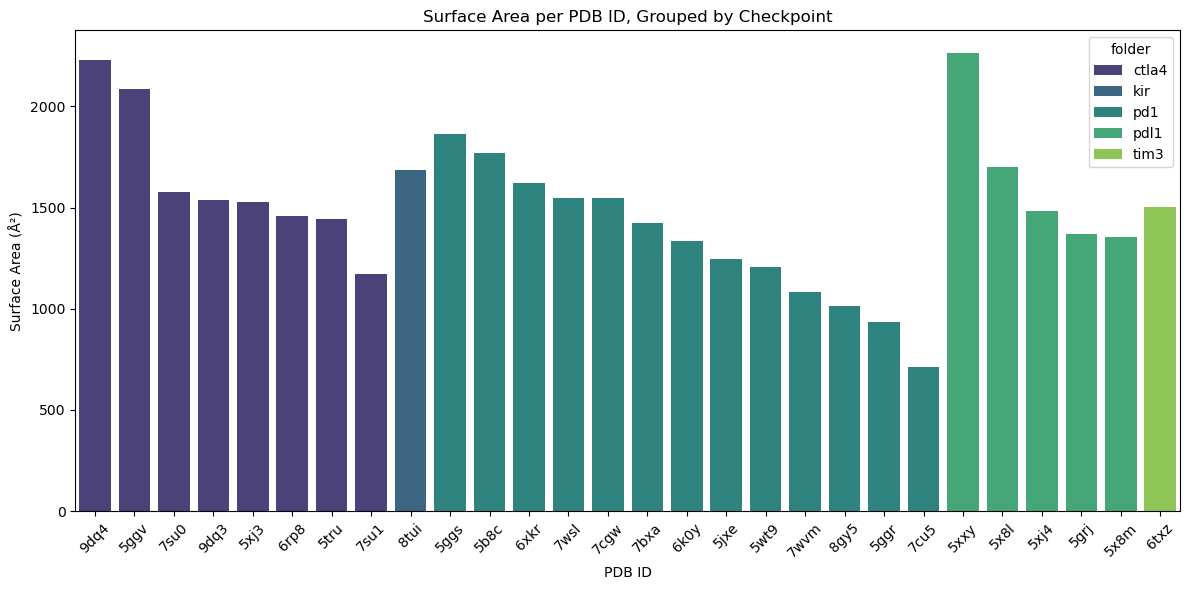

In [18]:
# Convert to DataFrame
df = pd.DataFrame(results)

# Sort by surface area (optional)
df = df.sort_values("epitope_area", ascending=False)

df_sorted = df.sort_values(by=["folder", "epitope_area"], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="pdb_id", y="epitope_area", hue="folder", palette="viridis")


plt.title("Surface Area per PDB ID, Grouped by Checkpoint")
plt.xlabel("PDB ID")
plt.ylabel("Surface Area (Å²)")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show() 
plt.savefig('plots/barplot_surface_area.pdf', bbox_inches = 'tight')
plt.show()




# plt.figure(figsize=(12, 6))
# sns.barplot(data=df, x="pdb_id", y="epitope_area", hue="folder")

# plt.title("Surface Area per PDB ID and Checkpoint")
# plt.xlabel("PDB ID")
# plt.ylabel("Surface Area (Å²)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [19]:
# # nicht generalisierter code
# from pymol import cmd

# # === User Input ===
# pdb_file = "7cu5.pdb"           # Replace with your file path
# antibody_chains = "Q"         # Replace with your antibody chains
# antigen_chain = "A"             # Replace with your antigen chain
# cutoff_distance = 5.0           # Distance cutoff in Å

# # === Load structure ===
# cmd.reinitialize()
# cmd.load(pdb_file)

# # === Define selections ===
# cmd.select("antibody", f"chain {antibody_chains}")
# cmd.select("antigen", f"chain {antigen_chain}")

# # === Epitope: antigen residues near antibody ===
# cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

# epitope_area = cmd.get_area("epitope")
# print(f"Epitope surface area: {epitope_area:.2f} Å²")

# # === Visualization ===
# cmd.show("cartoon", "all")
# cmd.show("sticks", "epitope")
# cmd.color("yellow", "epitope")
# cmd.label("epitope", "resn + resi")

# # === Save session ===
# output_name = pdb_file.replace(".pdb", "_epitope.pse")
# cmd.save(output_name)
# print(f"Epitope mapping done. Saved session as {output_name}")

In [33]:
cmd.distance("hbonds", "epitope and (donor or acceptor)", "antibody and (donor or acceptor)", mode=2)
cmd.set("dash_color", "blue", "hbonds")
cmd.set("dash_width", 2.0)
cmd.show("dashes", "hbonds")
hb_count = cmd.count_atoms("hbonds")


CmdException:  Error: Invalid selection name "hbonds".
( hbonds )<--